In [1]:
import pandas as pd
import re
import nltk
import random
import string
import os
import pandas as pd

In [2]:
def process_book(book_path, num_sentences=200, sentence_len=100):
    # Read the text book
    with open(book_path, 'r', encoding='utf-8') as f:
        book = f.read()


    # remove all the empty lines
    book = re.sub(r'\n\s*\n', '\n', book)


    # tokenize the book
    tokens = nltk.word_tokenize(book)


    # lower case all the words
    tokens = [w.lower() for w in tokens]


    # remove stopwords from tokens
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]


    # remove punctuation from tokens
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    tokens = [w for w in tokens if w.isalpha()]


    # get the author name
    author = re.search(r'Author: (.*)', book).group(1)


    # create random sentences from the tokens
    sentences = []
    for i in range(num_sentences):
        index = random.randint(0, len(tokens)-sentence_len)
        sentence = " ".join(tokens[index:index+sentence_len])
        sentences.append(sentence)


    # create a dataframe from the sentences associated with the author name as a label 
    df = pd.DataFrame({'sentence': sentences, 'author': author})


    return df

In [8]:
# define the folder path containing the books
folder_path ='F:/الكلية/DEBI/uottawa/NLP/assignment/assignment 3/BOOKS'

# create an empty dataframe to store the processed books
df_books = pd.DataFrame(columns=['sentence', 'author'])

# loop through all the files in the folder
for filename in os.listdir(folder_path):
    # check if the file is a text file
    print(filename)
    if filename.endswith('.txt'):
        # get the full path of the file
        file_path = os.path.join(folder_path, filename)
        # process the book and append the resulting dataframe to the main dataframe
        df_book = process_book(file_path)
        df_books = pd.concat([df_books, df_book], ignore_index=True)

# print the first few rows of the resulting dataframe
df_books.head()


BOOKS
Books Classification.ipynb


,sentence,author


In [5]:
df_books.tail()

,sentence,author


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='author', ylabel='count'>

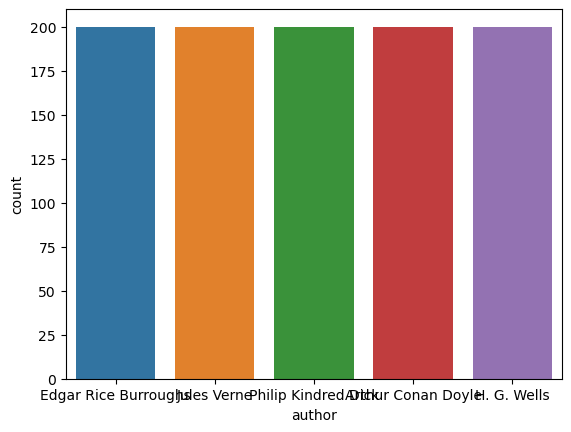

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df_books['author'])

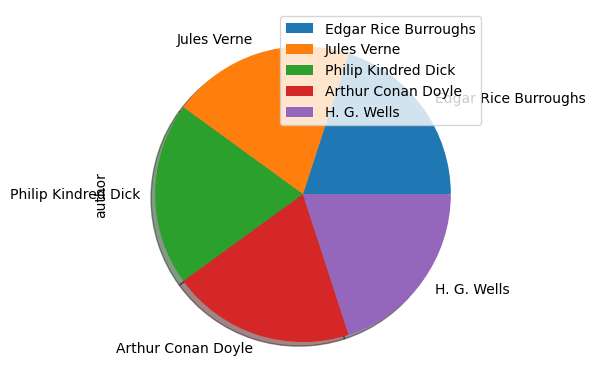

In [4]:
df_books['author'].value_counts().plot.pie( shadow = True)
plt.legend()
plt.show()

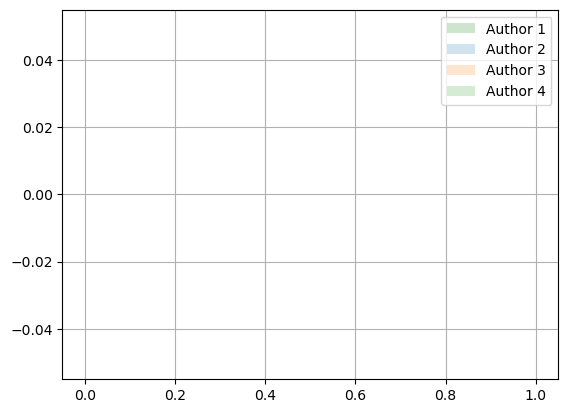

In [26]:
df_books['char_length']=df_books['sentence'].apply(len)
df_books[df_books['author']==0]['char_length'].hist(label=df_books['author'],alpha=0.2,color=['green'] )
df_books[df_books['author']==1]['char_length'].hist(label=df_books['author'],alpha=0.2)
df_books[df_books['author']==2]['char_length'].hist(label=df_books['author'],alpha=0.2)
df_books[df_books['author']==3]['char_length'].hist(label=df_books['author'],alpha=0.2)
df_books[df_books['author']==4]['char_length'].hist(label=df_books['author'],alpha=0.2)
plt.legend(['Author 1','Author 2','Author 3','Author 4'])


In [28]:
%pip install WordCloud

     -------------------------------------- 153.3/153.3 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Series([], Name: sentence, dtype: object)
                                              sentence                author  \
0    name away let fire hot slow xii cloak invisibi...  Edgar Rice Burroughs   
1    disasters befallen ship gone indeed compound i...  Edgar Rice Burroughs   
2    fleet helium could yet must make certain sped ...  Edgar Rice Burroughs   
3    curiosity piqued emphasis words know replied w...  Edgar Rice Burroughs   
4    well content fat greasy padwar guard moistened...  Edgar Rice Burroughs   
..                                                 ...                   ...   
995  earth particular laid stress gravitational dif...           H. G. Wells   
996  upon realisation interest shifted creatures re...           H. G. Wells   
997  colonel regiment came chobham bridge busy ques...           H. G. Wells   
998  door peeped kitchen triangle bright outer sunl...           H. G. Wells   
999  saw martian briareus handlingmachine scrutiniz...           H. G. Wells  

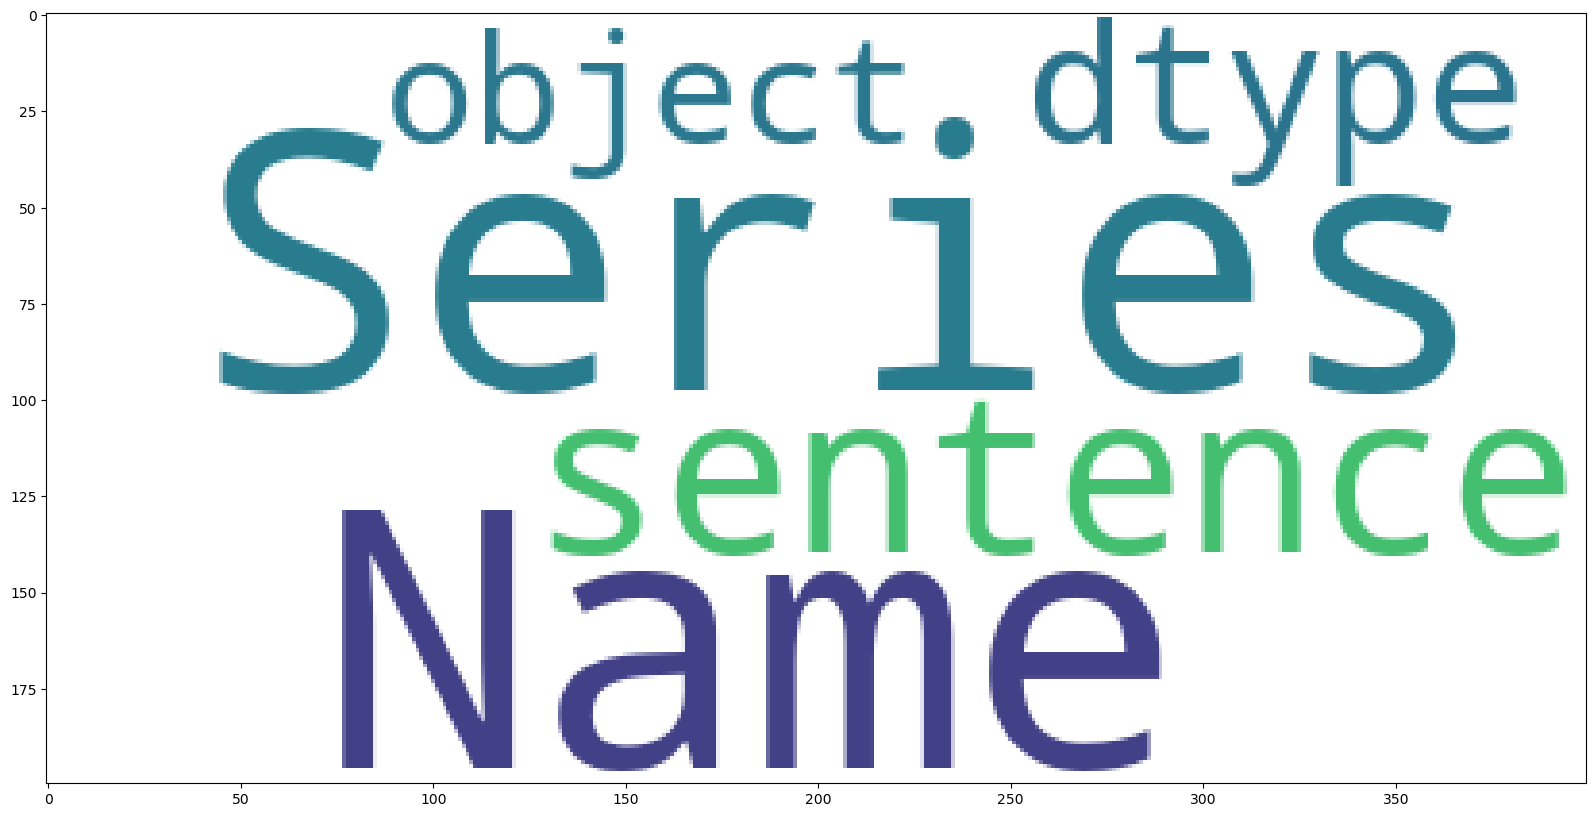

In [38]:
from wordcloud import WordCloud
import numpy as np

#tweet_mask = np.array(Image.open("twitter-logo-png-transparent.png"))
wc = WordCloud(collocations=False,
               background_color="white",
               max_words=200,
               contour_color='steelblue',
               contour_width=16,)

# Generate a wordcloud
print(str(df_books[df_books['author']==3]['sentence']))
print(df_books)
wc.generate(str(df_books[df_books['author']==3]['sentence']))


# show
plt.figure(figsize=[20,10])
plt.imshow(wc)

plt.show()

In [25]:
df_books['char_length']=df_books['sentence'].apply(len)
df_books


,sentence,author,char_length
0,name away let fire hot slow xii cloak invisibi...,Edgar Rice Burroughs,635
1,disasters befallen ship gone indeed compound i...,Edgar Rice Burroughs,717
2,fleet helium could yet must make certain sped ...,Edgar Rice Burroughs,692
3,curiosity piqued emphasis words know replied w...,Edgar Rice Burroughs,647
4,well content fat greasy padwar guard moistened...,Edgar Rice Burroughs,653
...,...,...,...
995,earth particular laid stress gravitational dif...,H. G. Wells,754
996,upon realisation interest shifted creatures re...,H. G. Wells,729
997,colonel regiment came chobham bridge busy ques...,H. G. Wells,716
998,door peeped kitchen triangle bright outer sunl...,H. G. Wells,738


In [5]:
import pandas as pd
import nltk

In [6]:
# split the data to X and y
X = df_books['sentence']
y = df_books['author']

In [7]:
# transform the data to a BOW
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)
count_array = X_dtm.toarray()
df = pd.DataFrame(count_array,columns = vect.get_feature_names())
df

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abandoning,abated,abbeville,abbey,abduct,abducted,abducting,abduction,...,zeal,zealand,zeiss,zigzag,zigzags,zode,zones,zoological,zoologist,zoology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# transform the data to a tf-idf representation
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X_dtm = vect.fit_transform(X)


In [9]:
#get elements from the sparse matrix
X_dtm[0, 0:1000].todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [10]:
# transfor y to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [11]:
set(y)

{0, 1, 2, 3, 4}

In [12]:
# get the class names
class_names = le.classes_
class_names

array(['Arthur Conan Doyle', 'Edgar Rice Burroughs', 'H. G. Wells',
       'Jules Verne', 'Philip Kindred Dick'], dtype=object)

In [13]:
# split the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.2, random_state=1)


In [14]:
# create a function to train and test the model with different performance metrics
from sklearn import metrics
def train_test_model(model, X_train, X_test, y_train, y_test):
    #print model name
    print(model.__class__.__name__)
    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    print("-"*50)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print("-"*50)
    print('Confusion Matrix: ', metrics.confusion_matrix(y_test, y_pred_class))
    print("-"*50)
    print('Classification Report:\n ', metrics.classification_report(y_test, y_pred_class))
    return model



In [15]:
# train and test the model with Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb = train_test_model(nb, X_train, X_test, y_train, y_test)

MultinomialNB
--------------------------------------------------
Accuracy:  0.945
--------------------------------------------------
Confusion Matrix:  [[39  0  0  0  1]
 [ 0 38  0  0  3]
 [ 0  0 31  2  3]
 [ 0  0  0 31  2]
 [ 0  0  0  0 50]]
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       1.00      0.93      0.96        41
           2       1.00      0.86      0.93        36
           3       0.94      0.94      0.94        33
           4       0.85      1.00      0.92        50

    accuracy                           0.94       200
   macro avg       0.96      0.94      0.95       200
weighted avg       0.95      0.94      0.95       200



In [16]:
# train and test the model with XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = train_test_model(xgb, X_train, X_test, y_train, y_test)

XGBClassifier
--------------------------------------------------
Accuracy:  0.92
--------------------------------------------------
Confusion Matrix:  [[37  2  0  0  1]
 [ 1 38  0  2  0]
 [ 1  0 30  3  2]
 [ 1  0  1 29  2]
 [ 0  0  0  0 50]]
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.95      0.93      0.94        41
           2       0.97      0.83      0.90        36
           3       0.85      0.88      0.87        33
           4       0.91      1.00      0.95        50

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.92       200
weighted avg       0.92      0.92      0.92       200



In [17]:
# train and test the model with SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm = train_test_model(svm, X_train, X_test, y_train, y_test)

SVC
--------------------------------------------------
Accuracy:  0.95
--------------------------------------------------
Confusion Matrix:  [[39  0  0  0  1]
 [ 0 38  0  0  3]
 [ 1  0 32  0  3]
 [ 0  0  0 31  2]
 [ 0  0  0  0 50]]
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       1.00      0.93      0.96        41
           2       1.00      0.89      0.94        36
           3       1.00      0.94      0.97        33
           4       0.85      1.00      0.92        50

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [18]:
# train and test the model with Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = train_test_model(rf, X_train, X_test, y_train, y_test)


RandomForestClassifier
--------------------------------------------------
Accuracy:  0.935
--------------------------------------------------
Confusion Matrix:  [[39  0  0  0  1]
 [ 1 37  0  0  3]
 [ 1  0 32  0  3]
 [ 0  0  0 31  2]
 [ 0  0  0  2 48]]
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       1.00      0.90      0.95        41
           2       1.00      0.89      0.94        36
           3       0.94      0.94      0.94        33
           4       0.84      0.96      0.90        50

    accuracy                           0.94       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.94      0.94      0.94       200

